In [1]:
import pandas as pd
import os
from glob import glob

# Définir le répertoire contenant vos fichiers parquet
data_dir = "../data/crypto_data"

# Lister tous les fichiers .parquet
all_files = glob(os.path.join(data_dir, "*.parquet"))
for i in all_files:
    print(i)

../data/crypto_data/btcusdc_15m.parquet
../data/crypto_data/btcusdc_1h.parquet
../data/crypto_data/btcusdc_1m.parquet
../data/crypto_data/btcusdc_1d.parquet
../data/crypto_data/btcusdc_4h.parquet


In [2]:
# Charger le fichier BTCUSDC en timeframe 1d
btc_file = data_dir + "/btcusdc_1d.parquet"
df = pd.read_parquet(btc_file)

# Vérifier le chargement
print(df.shape)
df.tail()

(2197, 12)


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,taker_buy_base,taker_buy_quote,ignore
2192,1748304000000,109478.01,110799.10,107547.13,108992.92,4879.95661,1748390399999,5.345024e+08,938591,2301.80236,2.522084e+08,0.0
2193,1748390400000,108992.92,109334.92,106814.85,107817.98,3549.21863,1748476799999,3.838646e+08,825601,1602.79008,1.733672e+08,0.0
2194,1748476800000,107817.98,108941.17,105333.00,105586.03,4356.44792,1748563199999,4.672355e+08,1109751,2141.01011,2.296995e+08,0.0
2195,1748563200000,105586.03,106342.00,103657.40,104041.77,5076.54853,1748649599999,5.333837e+08,1301466,2477.16699,2.603056e+08,0.0
2196,1748649600000,104041.76,104343.15,103127.00,103671.99,789.23508,1748735999999,8.187079e+07,212000,353.08902,3.663033e+07,0.0


In [3]:
# Colonnes à garder
# cols_to_keep = ['open_dt', 'open', 'high', 'low', 'close', 'volume']
cols_to_keep = ['open', 'high', 'low', 'close', 'volume']

# Sélectionner uniquement ces colonnes
df = df[cols_to_keep]

# # Renommer la colonne de date
# df = df.rename(columns={'open_dt': 'timestamp'})

# # Convertir en datetime et mettre en index
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df.set_index('timestamp').sort_index()

# Vérifier le résultat
print(df.columns.tolist())
df.head()

['open', 'high', 'low', 'close', 'volume']


,open,high,low,close,volume
0,3200.00,3312.32,3000.00,3183.47,283.213859
1,3183.47,3257.31,3178.54,3199.27,423.048529
2,3192.69,3587.35,3187.25,3494.65,1163.940291
3,3507.62,3683.35,3428.34,3670.11,1251.139627
4,3673.18,3920.00,3618.53,3676.32,2655.242827


### Glossaire détaillé des métriques du backtest EMA 12/26

---

#### 📆 Période analysée

| **Métrique** | **Définition détaillée**                                                                                                                                                           |
| ------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Start**    | Horodatage de la première bougie (candle) incluse dans le backtest. Il fixe le point de départ de toutes les statistiques.                                                         |
| **End**      | Horodatage de la dernière bougie testée.                                                                                                                                           |
| **Duration** | Période couverte, égale à `End – Start`. Utile pour replacer les résultats dans leur contexte temporel (par ex. savoir si la stratégie a traversé un marché haussier ou baissier). |

---

#### 💰 Capital & frais

| **Métrique**           | **Définition détaillée**                                                                                                                                 |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Equity Final \[\$]** | Valeur du portefeuille à la dernière barre après prise en compte des frais et de la valeur de la position ouverte éventuelle.                            |
| **Equity Peak \[\$]**  | Plus haut niveau d’equity atteint au cours du backtest ― sert de référence pour le drawdown max.                                                         |
| **Commissions \[\$]**  | Somme totale payée en frais de transaction (commissions, slippage simulé, etc.).                                                                         |
| **Exposure Time \[%]** | Pourcentage du temps où la stratégie est investie (≥ 1 satoshi) par rapport à la durée totale. Mesure la « fréquence d’exposition » au risque de marché. |

---

#### 📈 Performance brute

| **Métrique**               | **Définition détaillée**                                                                                                                                                        |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Return \[%]**            | Performance globale : `(Equity_Fin / Equity_Init – 1) × 100`.                                                                                                                   |
| **Buy & Hold Return \[%]** | Rendement qu’aurait fourni l’achat initial de l’actif et sa conservation jusqu’à la fin (comparaison passive vs. active).                                                       |
| **Return (Ann.) \[%]**     | Rendement annualisé en extrapolant le Return sur 365 jours : `((1 + Return)^(365/Duration_days) – 1) × 100`.                                                                    |
| **CAGR \[%]**              | Taux de croissance annuel composé : reflète la croissance lissée année après année, méthodologie équivalente au Return (Ann.) mais généralement préférée pour >1 an de données. |
| **Volatility (Ann.) \[%]** | Écart-type annualisé des rendements quotidiens ; quantifie l’« amplitude » moyenne des variations.                                                                              |

---

#### 📊 Ratios ajustés au risque

| **Métrique**      | **Définition détaillée**  |
| ----------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Sharpe Ratio**  | `(Return (Ann.) – Rf) / Volatility (Ann.)` où `Rf` est le taux sans risque (souvent ≈ 0 dans Backtesting.py). Plus il est haut, meilleur est le rendement par unité de volatilité. | 
| **Sortino Ratio** | Variante du Sharpe : on divise par la seule **volatilité baissière** (écart-type des rendements < 0). Récompense les stratégies à pertes rares mais à forte volatilité haussière.  |
| **Calmar Ratio**  | \`CAGR / Max. Drawdown \`. Mesure combien d’alpha annuel on obtient par point de drawdown. |
| **Alpha \[%]**    | Sur- ou sous-performance annuelle relative à un bench (Buy & Hold ici). Approximée dans Backtesting.py ; > 0 % indique de la valeur ajoutée.  |     
| **Beta**          | Sensibilité du portefeuille aux variations du bench ; ≈ 1 : suit le marché, < 1 : moins volatile, > 1 : amplifie les mouvements.|

---

#### 📉 Drawdowns

| **Métrique**               | **Définition détaillée**                                                                                                      |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Max. Drawdown \[%]**     | Plus forte perte relative depuis un pic d’equity jusqu’au creux suivant. Indicateur clé du risque psychologique et financier. |
| **Avg. Drawdown \[%]**     | Moyenne arithmétique de tous les drawdowns mesurés.                                                                           |
| **Max. Drawdown Duration** | Nombre de jours entre le sommet précédant le drawdown et la récupération complète (nouveau sommet).                           |
| **Avg. Drawdown Duration** | Durée moyenne de tous les épisodes de drawdown.                                                                               |

---

#### 🛒 Statistiques de trading

| **Métrique**            | **Définition détaillée**                                                                                                         |               |                                                                            |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------- | ------------- | -------------------------------------------------------------------------- |
| **# Trades**            | Nombre total d’ordres « round-trip » (entrée + sortie).                                                                          |               |                                                                            |
| **Win Rate \[%]**       | Part des trades clôturés avec un gain net.                                                                                       |               |                                                                            |
| **Best Trade \[%]**     | Rendement du trade le plus profitable.                                                                                           |               |                                                                            |
| **Worst Trade \[%]**    | Rendement du trade le plus perdant.                                                                                              |               |                                                                            |
| **Avg. Trade \[%]**     | Moyenne arithmétique des rendements de chaque trade.                                                                             |               |                                                                            |
| **Max. Trade Duration** | Durée du trade ouvert le plus longtemps.                                                                                         |               |                                                                            |
| **Avg. Trade Duration** | Durée moyenne de détention d’une position.                                                                                       |               |                                                                            |
| **Profit Factor**       | \`Somme\_Gains /                                                                                                                 | Somme\_Pertes | \` sur l’ensemble des trades. > 1 signifie stratégie globalement rentable. |
| **Expectancy \[%]**     | Gain/perte moyen espéré par trade, tenant compte de la win-rate et du ratio gains/pertes.                                        |               |                                                                            |
| **SQN**                 | **System Quality Number** de Van Tharp : `√n × (Avg_Trade / Std_Dev_Trades)`. > 2 : très bon ; > 3 : excellent.                  |               |                                                                            |
| **Kelly Criterion**     | Fraction optimale du capital à risquer sur chaque trade pour maximiser la croissance logarithmique (théorique, sans contrainte). |               |                                                                            |

---

#### 📝 Interprétation rapide

* **Sharpe, Sortino, Calmar** : privilégiez la comparaison relative à d’autres stratégies - une valeur « absolue » n’a de sens qu’avec un bench et un horizon fixés.
* **Max. Drawdown & Win Rate** : aident à juger la « tenue psychologique » nécessaire.
* **Profit Factor / Expectancy** : offrent une vue synthétique ; un PF < 1 signale quasi toujours une stratégie perdante, sauf si la win-rate compense un ratio gain/perte exceptionnel.
* **Kelly** : intéressant comme borne théorique ; la pratique impose souvent de miser ½ ou ⅓ du Kelly pour réduire la variance.



In [4]:
# Précisions sur les indicateurs de backtest 
_DESCRIPTIONS = {
    # Dates & durée
    "Start":                 "Première date du backtest",
    "End":                   "Dernière date du backtest",
    "Duration":              "Période totale analysée",

    # Exposition & capital
    "Exposure Time [%]":     "Temps passé en position",
    "Equity Final [$]":      "Capital final",
    "Equity Peak [$]":       "Plus haut capital atteint",
    "Commissions [$]":       "Frais totaux payés",

    # Performances
    "Return [%]":            "Rendement net",
    "Buy & Hold Return [%]": "Performance buy-&-hold",
    "Return (Ann.) [%]":     "Rendement annualisé",
    "Volatility (Ann.) [%]": "Volatilité annualisée",
    "CAGR [%]":              "Taux de croissance annualisé",
    "Sharpe Ratio":          "Ratio rendement/volatilité",
    "Sortino Ratio":         "Sharpe corrigé des baisses",
    "Calmar Ratio":          "Ratio rendement / DD max",
    "Alpha [%]":             "Surperformance vs marché",
    "Beta":                  "Sensibilité au marché",

    # Drawdowns
    "Max. Drawdown [%]":     "Pire retrait maximal",
    "Avg. Drawdown [%]":     "Retrait moyen",
    "Max. Drawdown Duration":"Durée du pire retrait",
    "Avg. Drawdown Duration":"Durée moyenne des retraits",

    # Trades
    "# Trades":              "Nombre total de trades",
    "Win Rate [%]":          "Trades gagnants (%)",
    "Best Trade [%]":        "Trade le plus gagnant",
    "Worst Trade [%]":       "Trade le plus perdant",
    "Avg. Trade [%]":        "Gain/perte moyen",
    "Max. Trade Duration":   "Durée max d'un trade",
    "Avg. Trade Duration":   "Durée moyenne des trades",
    "Profit Factor":         "Somme gains / pertes",
    "Expectancy [%]":        "Gain espéré par trade",
    "SQN":                   "Quality Number de Van Tharp",
    "Kelly Criterion":       "Fraction idéale à miser",
}

In [5]:
# ema12_26_backtest.py
# ──────────────────────────────────────────────────────────────────────────────
import os
import pathlib
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate    # pip install tabulate (facultatif)

# ─── Filtrage / résolution des avertissements ────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)

# ─── Paramètres utilisateur ───────────────────────────────────────────────────
X = 2000                         # Nombre de barres à backtester
INITIAL_CAPITAL = 3_000         # Capital de départ (USDC)
COMMISSION = 0.01               # 0,05 % de frais (réduit) → 0.01 = 1 %
DATA_FILE = "../data/crypto_data/btcusdc_1d.parquet"

# ─── Chargement et préparation des données ───────────────────────────────────
df = pd.read_parquet(DATA_FILE)
df = df.rename(
    columns=dict(
        open="Open",
        high="High",
        low="Low",
        close="Close",
        volume="Volume",
    )
)

df_bt = df[["Open", "High", "Low", "Close", "Volume"]].copy()

# ─── Conversion BTC → satoshis pour éviter le fractional trading ─────────────
SATOSHIS_PER_BTC = 100_000_000
for col in ["Open", "High", "Low", "Close"]:
    df_bt[col] /= SATOSHIS_PER_BTC

# Calcul des moyennes mobiles exponentielles
df_bt["EMA12"] = df_bt["Close"].ewm(span=12, adjust=False).mean()
df_bt["EMA50"] = df_bt["Close"].ewm(span=50, adjust=False).mean()

# Ne conserver que les X dernières barres
df_bt = df_bt.tail(X)

print("Exemple conversion BTC/SAT")
print(f"1 Satoshi : {df_bt['Close'].iloc[-1]:.8f} USDC")
print(f"1 BTC     : {df_bt['Close'].iloc[-1] * SATOSHIS_PER_BTC:.2f} USDC")

# ─── Définition de la stratégie EMA Crossover ────────────────────────────────
class EMACrossoverStrategy(Strategy):
    position_size = 0.50      # 50 % de l’equity par trade
    risk_percent = 0.01      # 1 % d’equity risqué
    tp_sl_ratio = 2        # TP:SL = 3.5 : 1

    def init(self):
        self.ema_short = self.I(lambda x: x, self.data.EMA12, name="EMA12")
        self.ema_long = self.I(lambda x: x, self.data.EMA50, name="EMA50")

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            position_value = self.equity * self.position_size
            qty = position_value / price

            risk_amount = self.equity * self.risk_percent
            sl_per_sat = risk_amount / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

# ─── Exécution du backtest ───────────────────────────────────────────────────
bt = Backtest(
    df_bt,
    EMACrossoverStrategy,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True,
)

stats = bt.run()

# ─── Mise en forme & export des statistiques ────────────────────────────────
def _beautify(val):
    """Pourcentages jolis pour |val| < 1, sinon 2 décimales."""
    if isinstance(val, (float, int)):
        if abs(val) < 1 and val != 0:
            return f"{val:.2%}"
        return f"{val:.2f}"
    return val

stats_df = stats.to_frame(name="Value")
stats_df.index.name = "Metric"

# ⚠️  remplacement de applymap → map  (plus de FutureWarning)
stats_formatted = stats_df.head(31).map(_beautify)

stats_df["Description"] = stats_df.index.map(lambda k: _DESCRIPTIONS.get(k, "—"))

mapper = "map" if hasattr(stats_df, "map") else "applymap"
stats_formatted = getattr(stats_df.head(31), mapper)(_beautify)

print("\n===== Statistiques EMA 12/26 =====")
print(tabulate(
    stats_formatted.reset_index(),   # tabulate n'aime pas les index hiérarchiques
    headers=["Metric", "Value", "Description"],
    tablefmt="github",
))
# stats_formatted.to_csv(STATS_FILE, encoding="utf-8")
# print(f"\nStats enregistrées dans : {STATS_FILE}")

# ─── Plot du backtest ────────────────────────────────────────────────────────
bt.plot()
plt.show()


/Users/sloutmyv/Documents/Github/trading-overview/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/sloutmyv/Documents/Github/trading-overview/.venv/lib/python3.12/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/var/folders/1c/4qkwgvwx0f99zflb8pj1c26h0000gn/T/ipykernel_15552/859364195.py:83: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(


Exemple conversion BTC/SAT
1 Satoshi : 0.00103672 USDC
1 BTC     : 103671.99 USDC



===== Statistiques EMA 12/26 =====
|    | Metric                 | Value   | Description                 |
|----|------------------------|---------|-----------------------------|
|  0 | Start                  | 197.00  | Première date du backtest   |
|  1 | End                    | 2196.00 | Dernière date du backtest   |
|  2 | Duration               | 1999.00 | Période totale analysée     |
|  3 | Exposure Time [%]      | 4.65    | Temps passé en position     |
|  4 | Equity Final [$]       | 2815.28 | Capital final               |
|  5 | Equity Peak [$]        | 3122.16 | Plus haut capital atteint   |
|  6 | Commissions [$]        | 624.29  | Frais totaux payés          |
|  7 | Return [%]             | -6.16   | Rendement net               |
|  8 | Buy & Hold Return [%]  | 864.49  | Performance buy-&-hold      |
|  9 | Return (Ann.) [%]      | 0.00    | Rendement annualisé         |
| 10 | Volatility (Ann.) [%]  | nan     | Volatilité annualisée       |
| 11 | Sharpe Ratio         

In [8]:
"""ema_optim_grid_pf.py – optimisation de la stratégie EMA Crossover
Remplacement des sorties basées sur le Sharpe Ratio par le Profit Factor.
"""
import itertools
import pathlib
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate
from tqdm import tqdm  # pip install tqdm (barre de progression)

# ─── Filtrer quelques warnings bruyants ───────────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)

# ─── Paramètres généraux ──────────────────────────────────────────────────────
DATA_FILE = "../data/crypto_data/btcusdc_1d.parquet"
OUTPUT_DIR = pathlib.Path("../data/strategy/005")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
RESULT_CSV = OUTPUT_DIR / "ema_grid_results.csv"

INITIAL_CAPITAL = 3_000  # USDC
COMMISSION = 0.001  # 0.1 %
X_LAST_BARS = 2_000  # Taille de l’échantillon temporel

TRAIN_RATIO = 0.80  # ← proportion des *premières* lignes pour l’optimisation
TOP_N_PRINT = 10  # combien de combinaisons afficher en console

# ─── Chargement / pré-traitement des données ──────────────────────────────────
df = pd.read_parquet(DATA_FILE).rename(
    columns={
        "open_dt": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
        "volume": "Volume",
    }
)

df_bt = df[["Open", "High", "Low", "Close", "Volume"]].copy()

# Conversion BTC → satoshis (éviter le fractional trading)
SATOSHIS_PER_BTC = 100_000_000
df_bt[["Open", "High", "Low", "Close"]] /= SATOSHIS_PER_BTC

# Garder uniquement les X dernières barres
df_bt = df_bt.tail(X_LAST_BARS)

# ─── Découpage train / test chronologique ─────────────────────────────────────
split_idx = int(len(df_bt) * TRAIN_RATIO)
df_train = df_bt.iloc[:split_idx].copy()  # optimisation
df_test = df_bt.iloc[split_idx:].copy()  # évaluation hors-échantillon

print(
    f"[i] Optimisation sur {len(df_train):,} barres "
    f"({TRAIN_RATIO:.0%}), test sur {len(df_test):,} barres ({1-TRAIN_RATIO:.0%})."
)

# ─── Stratégie paramétrable ───────────────────────────────────────────────────
class EMACrossoverParam(Strategy):
    """Stratégie de croisement d'EMA avec paramètres configurables."""

    # Ces attributs seront écrasés dynamiquement durant la grille
    short_span = 12  # short EMA
    long_span = 26  # long  EMA
    position_size = 0.5  # 50 % de l’equity
    risk_percent = 0.01  # 1 % d’equity risqué
    tp_sl_ratio = 3.5  # TP:SL = 3.5 : 1

    def init(self):
        self.ema_short = self.I(
            lambda c, s: pd.Series(c).ewm(span=s, adjust=False).mean(),
            self.data.Close,
            self.short_span,
            name="EMA_short",
        )
        self.ema_long = self.I(
            lambda c, l: pd.Series(c).ewm(span=l, adjust=False).mean(),
            self.data.Close,
            self.long_span,
            name="EMA_long",
        )

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            pos_val = self.equity * self.position_size
            qty = pos_val / price

            risk_amt = self.equity * self.risk_percent
            sl_per_sat = risk_amt / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

# ─── Définition de la grille de recherche ─────────────────────────────────────
SHORT_SPANS = range(6, 31, 3)  # 6, 9, 12, …, 30
LONG_SPANS = range(20, 121, 10)  # 20, 30, 40, …, 120
POSITION_SIZES = [0.25, 0.5, 0.75]
RISK_PERCENTS = [0.005, 0.01]  # 0.5 % ou 1 %
TP_SL_RATIOS = [2.0, 3.0, 3.5, 4.0]

param_grid = list(
    itertools.product(
        SHORT_SPANS, LONG_SPANS, POSITION_SIZES, RISK_PERCENTS, TP_SL_RATIOS
    )
)
# Filtre rapide : EMA courte doit être < EMA longue
param_grid = [p for p in param_grid if p[0] < p[1]]

print(f"[i] {len(param_grid)} combinaisons à tester…")

# ─── Loop de backtests & collecte des stats ───────────────────────────────────
results = []
bt_train = Backtest(
    df_train,
    EMACrossoverParam,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True,
)

for s_span, l_span, p_size, r_pct, tp_ratio in tqdm(param_grid, ncols=80):
    stats = bt_train.run(
        short_span=s_span,
        long_span=l_span,
        position_size=p_size,
        risk_percent=r_pct,
        tp_sl_ratio=tp_ratio,
    )
    results.append(
        {
            "short_span": s_span,
            "long_span": l_span,
            "position_size": p_size,
            "risk_percent": r_pct,
            "tp_sl_ratio": tp_ratio,
            **stats.to_dict(),
        }
    )

# ─── DataFrame final + tri sur le rendement net ──────────────────────────────
res_df = pd.DataFrame(results).sort_values("Return [%]", ascending=False)
res_df.to_csv(RESULT_CSV, index=False)
print(f"\nRésultats complets enregistrés dans : {RESULT_CSV}")

# ─── Affichage console du TOP N ──────────────────────────────────────────────
# Remplacement du Sharpe Ratio -> Profit Factor dans la sortie
cols_show = [
    "short_span",
    "long_span",
    "position_size",
    "risk_percent",
    "tp_sl_ratio",
    "Return [%]",
    "Profit Factor",  # ← nouveau
    "Max. Drawdown [%]",
]

print(f"\n=== TOP {TOP_N_PRINT} par Return [%] (train) ===")
print(
    tabulate(
        res_df.head(TOP_N_PRINT)[cols_show],
        headers="keys",
        tablefmt="github",
        floatfmt=".2f",
    )
)

# ─── Exécution du meilleur run sur train puis test ───────────────────────────
best_params = res_df.iloc[0][
    [
        "short_span",
        "long_span",
        "position_size",
        "risk_percent",
        "tp_sl_ratio",
    ]
].to_dict()

# (1) Ré-exécution sur le train pour affichage/plot
best_stats_train = bt_train.run(**best_params)

# (2) Évaluation hors-échantillon sur df_test
bt_test = Backtest(
    df_test,
    EMACrossoverParam,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True,
)
best_stats_test = bt_test.run(**best_params)

print("\n→ Résumé hors-échantillon :")
print(
    tabulate(
        best_stats_test[["Return [%]", "Profit Factor", "Max. Drawdown [%]"]]
        .to_frame("Test set")
        .map(lambda v: f"{v:.2f}"),
        headers=["Metric", "Value"],
        tablefmt="github",
    )
)

# ─── Plot sur tout l’historique pour visualiser rapidement ───────────────────
# (optionnel : plot uniquement test = bt_test.plot())
bt_train.plot()
plt.show()


/var/folders/1c/4qkwgvwx0f99zflb8pj1c26h0000gn/T/ipykernel_15252/2911670540.py:126: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt_train = Backtest(


[i] Optimisation sur 1,600 barres (80%), test sur 400 barres (20%).
[i] 2256 combinaisons à tester…


100%|███████████████████████████████████████| 2256/2256 [00:39<00:00, 57.17it/s]



Résultats complets enregistrés dans : ../data/strategy/005/ema_grid_results.csv

=== TOP 10 par Return [%] (train) ===
|      |   short_span |   long_span |   position_size |   risk_percent |   tp_sl_ratio |   Return [%] |   Profit Factor |   Max. Drawdown [%] |
|------|--------------|-------------|-----------------|----------------|---------------|--------------|-----------------|---------------------|
|  607 |        12.00 |       50.00 |            0.25 |           0.01 |          4.00 |        23.94 |            3.56 |               -5.33 |
| 1567 |        24.00 |       30.00 |            0.25 |           0.01 |          4.00 |        23.94 |            3.56 |               -5.33 |
| 1111 |        18.00 |       40.00 |            0.25 |           0.01 |          4.00 |        22.64 |            3.20 |               -5.33 |
| 1327 |        21.00 |       30.00 |            0.25 |           0.01 |          4.00 |        22.64 |            3.20 |               -5.13 |
|   53 |        

/var/folders/1c/4qkwgvwx0f99zflb8pj1c26h0000gn/T/ipykernel_15252/2911670540.py:197: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt_test = Backtest(
                                                      


→ Résumé hors-échantillon :
| Metric            |   Value |
|-------------------|---------|
| Return [%]        |   -0.35 |
| Profit Factor     |    1    |
| Max. Drawdown [%] |   -5.34 |


Processus en quatre étapes pour développer et valider des stratégies de trading, applicable notamment aux stratégies basées sur les prix.
Voici les quatre étapes :
1. Excellence dans l'échantillon (In-sample excellence) : Cette étape consiste à optimiser la stratégie sur des données historiques et à évaluer si les résultats obtenus sont excellents et ne présentent pas de surajustement évident.
2. Test de permutation Monte Carlo dans l'échantillon (In-sample Monte Carlo permutation test) vise à déterminer si l'excellente performance dans l'échantillon est due à des schémas intrinsèques des données ou à un biais d'exploration des données (data mining bias). Il s'agit de générer des permutations des données de prix qui conservent les propriétés statistiques mais suppriment les schémas légitimes, puis d'optimiser la stratégie sur ces ensembles de données permutées. Une valeur P est calculée pour évaluer la probabilité que les résultats réels soient dus au biais d'exploration des données. Une valeur P inférieure à 1% est considérée comme un succès.
3. Test hors échantillon progressif (Walk-forward test) consiste à optimiser la stratégie sur des données historiques, puis à la tester sur de nouvelles données non vues, simulant ainsi le trading en conditions réelles. 
4. Test de permutation Monte Carlo hors échantillon progressif (Walk-forward Monte Carlo permutation test) évalue si des résultats satisfaisants en mode hors échantillon progressif sont dus à de véritables schémas ou simplement à la chance. Il consiste à permuter les données après la première phase d'entraînement et à évaluer la performance de la stratégie sur ces permutations. Une valeur P d'environ 5% est acceptable pour une année de données, tandis que 1% est préférable pour deux années ou plus.

Développer un script Python pour backtester une stratégie de trading en utilisant un processus en quatre étapes :
1. Optimisation des paramètres de la stratégie sur un ensemble de données historiques (in-sample) pour atteindre une performance 'excellente' tout en évitant le surajustement.
2. Réalisation d'un test de permutation Monte Carlo sur les résultats in-sample pour valider que la performance n'est pas due au hasard ou au data mining (objectif P-value < 1%).
3. Mise en œuvre d'un test hors échantillon progressif (walk-forward) où la stratégie est optimisée sur une fenêtre de données historiques glissante et testée sur la période suivante.
4. Exécution d'un test de permutation Monte Carlo sur les résultats du test hors échantillon progressif pour confirmer la robustesse de la stratégie (objectif P-value < 5% pour 1 an de données, < 1% pour 2 ans ou plus).

Une stratégie surajustée affichera des résultats exceptionnels (par exemple, des profits élevés, un faible drawdown) lorsqu'elle est testée sur les données historiques utilisées pour la construire et l'optimiser. Cela donne une fausse impression de sa robustesse. Une stratégie surajustée manque de capacité à généraliser ses règles à des conditions de marché différentes de celles de son ensemble d'entraînement. Elle n'a pas appris les principes fondamentaux et robustes du marché, mais plutôt les particularités d'un ensemble de données spécifique.

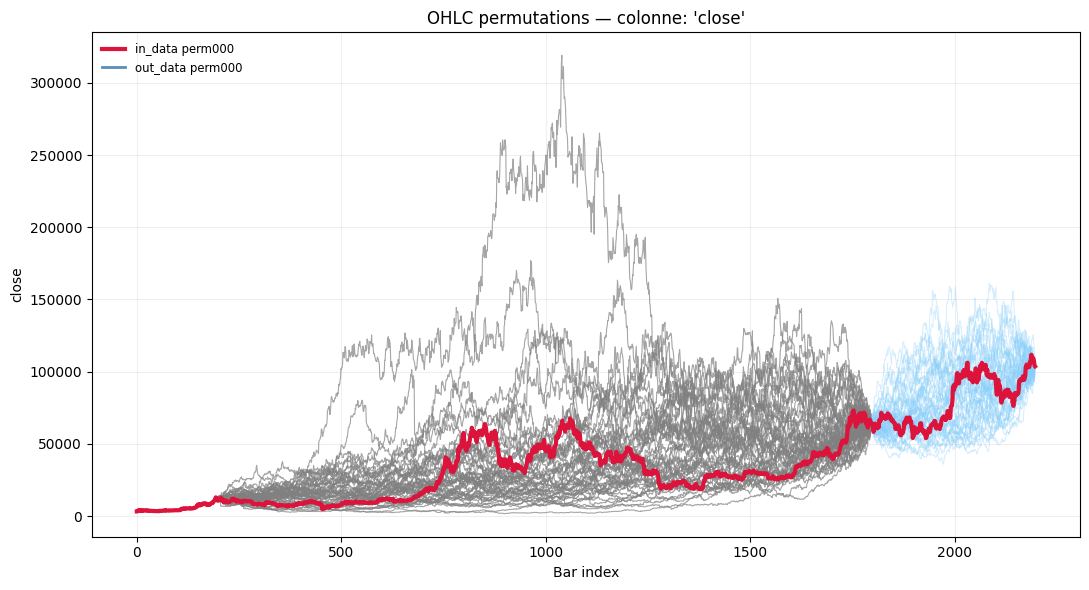


Statistical comparison — in_data_perm (log-returns)
perm000 :  mean=1.586e-03  std=3.537e-02  skew=-1.230  kurt=21.738
ensemble: mean=1.586e-03  std=3.531e-02  skew=-1.264  kurt=21.918

Statistical comparison — out_data_perm (log-returns)
perm000 :  mean=1.586e-03  std=3.537e-02  skew=-1.230  kurt=21.738
ensemble: mean=1.586e-03  std=3.537e-02  skew=-1.230  kurt=21.737


In [18]:
from __future__ import annotations
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  scipy.stats import skew, kurtosis

# === CONFIGURATION =========================================================
IN_DIR   = Path("../data/in_data_perm/btcusdc_1d")   # jeu de référence
OUT_DIR  = Path("../data/out_data_perm/btcusdc_1d")  # NOUVEAU jeu à comparer
PATTERN  = "*_perm*.parquet"
COL      = "close"
REBASE   = False
# ===========================================================================


###############################################################################
# DATA LOADING ################################################################
###############################################################################

def load_permutations(folder: Path, pattern: str = PATTERN):
    """Retourne une liste `(stem, ndarray_close)` triée par nom de fichier."""
    files = sorted(folder.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No files matching {pattern} in {folder}")

    data: list[tuple[str, np.ndarray]] = []
    for fp in files:
        df = pd.read_parquet(fp)
        if COL not in df.columns:
            raise KeyError(f"Column '{COL}' missing in {fp.name}")
        arr = df[COL].to_numpy(copy=True)
        if REBASE:
            arr = arr / arr[0]
        data.append((fp.stem, arr))
    return data


###############################################################################
# STATISTICS ##################################################################
###############################################################################

def _log_returns(price: np.ndarray) -> np.ndarray:
    return np.diff(np.log(price))


def stat_summary(arr: np.ndarray) -> dict[str, float]:
    r = _log_returns(arr)
    return {
        "mean": float(r.mean()),
        "std":  float(r.std(ddof=0)),
        "skew": float(skew(r, bias=False)),
        "kurt": float(kurtosis(r, bias=False)),
    }


def print_comparison(data, title: str = "ensemble"):
    """Affiche les stats de perm000 et la moyenne de l’ensemble."""
    stats_perm0 = None
    ensemble = []

    for name, arr in data:
        st = stat_summary(arr)
        if name.endswith("perm000"):
            stats_perm0 = st
        ensemble.append(st)

    if stats_perm0 is None:
        raise ValueError("perm000 file not found in data set.")

    ensemble_df = pd.DataFrame(ensemble)
    stats_ens = ensemble_df.mean().to_dict()

    print(f"\nStatistical comparison — {title} (log-returns)")
    print("==============================================")
    print(f"perm000 :  mean={stats_perm0['mean']:.3e}  std={stats_perm0['std']:.3e}  "
          f"skew={stats_perm0['skew']:.3f}  kurt={stats_perm0['kurt']:.3f}")
    print(f"ensemble: mean={stats_ens['mean']:.3e}  std={stats_ens['std']:.3e}  "
          f"skew={stats_ens['skew']:.3f}  kurt={stats_ens['kurt']:.3f}")


###############################################################################
# PLOTTING ####################################################################
###############################################################################

def plot_dual_permutation_sets(data_in, data_out):
    """Superpose deux ensembles de permutations sur la même figure."""
    plt.figure(figsize=(11, 6))

    # --- 1. Dossier IN (gris + rouge) ---------------------------------------
    for name, arr in data_in:
        x = np.arange(arr.size)
        if name.endswith("perm000"):
            plt.plot(x, arr, lw=3, color="crimson", zorder=5,
                     label="in_data perm000")
        else:
            plt.plot(x, arr, lw=0.8, color="gray",  alpha=0.7,
                     label="_nolegend_")

    # --- 2. Dossier OUT (bleu pâle) -----------------------------------------
    for name, arr in data_out:
        x = np.arange(arr.size)
        if name.endswith("perm000"):
            plt.plot(x, arr, lw=2, color="steelblue", alpha=0.9, zorder=4,
                     label="out_data perm000")
        else:
            plt.plot(x, arr, lw=0.7, color="lightskyblue", alpha=0.35,
                     label="_nolegend_")

    # ------------------------------------------------------------------------
    plt.title(f"OHLC permutations — colonne: '{COL}'")
    plt.xlabel("Bar index")
    plt.ylabel(COL)
    plt.grid(alpha=0.2)

    plt.legend(loc="upper left", fontsize="small", frameon=False)
    plt.tight_layout()
    plt.show()


###############################################################################
# MAIN ########################################################################
###############################################################################

if __name__ == "__main__":
    # Chargement des deux jeux
    data_in  = load_permutations(IN_DIR)
    data_out = load_permutations(OUT_DIR)

    # 1) Affichage graphique combiné
    plot_dual_permutation_sets(data_in, data_out)

    # 2) Résumés statistiques indépendants
    print_comparison(data_in,  title="in_data_perm")
    print_comparison(data_out, title="out_data_perm")


In [6]:
"""
test_strategy_permutations.py – Test de la stratégie EMA optimisée sur les permutations
"""
import pathlib
import warnings
import glob
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate
from tqdm import tqdm
import numpy as np

# ─── Filtrer quelques warnings bruyants ───────────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)
warnings.filterwarnings(
    "ignore",
    message="Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.",
)

# ─── Paramètres optimisés ─────────────────────────────────────────────────────
OPTIMIZED_PARAMS = {
    "short_span": 9,
    "long_span": 20,
    "position_size": 0.50,
    "risk_percent": 0.01,
    "tp_sl_ratio": 3.5
}

# ─── Paramètres généraux ──────────────────────────────────────────────────────
PERM_DIR = pathlib.Path("../data/in_data_perm/btcusdc_1d")
REFERENCE_FILE = PERM_DIR / "btcusdc_1d_perm000.parquet"
OUTPUT_DIR = pathlib.Path("../data/strategy/permutation_results")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

INITIAL_CAPITAL = 3_000  # USDC
COMMISSION = 0.001  # 0.1 %
X_LAST_BARS = 2_000  # Taille de l'échantillon temporel
TRAIN_RATIO = 0.80  # Pour le calcul de référence sur perm000

# ─── Stratégie (même que dans le script d'optimisation) ──────────────────────
class EMACrossoverParam(Strategy):
    """Stratégie de croisement d'EMA avec paramètres configurables."""
    
    short_span = 12
    long_span = 26
    position_size = 0.5
    risk_percent = 0.01
    tp_sl_ratio = 3.5

    def init(self):
        self.ema_short = self.I(
            lambda c, s: pd.Series(c).ewm(span=s, adjust=False).mean(),
            self.data.Close,
            self.short_span,
            name="EMA_short",
        )
        self.ema_long = self.I(
            lambda c, l: pd.Series(c).ewm(span=l, adjust=False).mean(),
            self.data.Close,
            self.long_span,
            name="EMA_long",
        )

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            pos_val = self.equity * self.position_size
            qty = pos_val / price

            risk_amt = self.equity * self.risk_percent
            sl_per_sat = risk_amt / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

def prepare_data(df):
    """Prépare les données pour le backtesting"""
    # Renommage des colonnes
    rename_dict = {
        "open_dt": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
    }
    
    # Ajouter volume seulement si elle existe
    if "volume" in df.columns:
        rename_dict["volume"] = "Volume"
    
    df_bt = df.rename(columns=rename_dict)
    
    # Sélectionner les colonnes nécessaires
    required_cols = ["Open", "High", "Low", "Close"]
    if "Volume" in df_bt.columns:
        required_cols.append("Volume")
    else:
        # Créer une colonne Volume fictive si elle n'existe pas
        df_bt["Volume"] = 1.0
    
    df_bt = df_bt[required_cols].copy()
    
    # Conversion BTC → satoshis
    SATOSHIS_PER_BTC = 100_000_000
    df_bt[["Open", "High", "Low", "Close"]] /= SATOSHIS_PER_BTC
    
    return df_bt

def run_backtest(df_data, params):
    """Exécute un backtest avec les paramètres donnés"""
    bt = Backtest(
        df_data,
        EMACrossoverParam,
        cash=INITIAL_CAPITAL,
        commission=COMMISSION,
        trade_on_close=True,
        exclusive_orders=True,
    )
    
    stats = bt.run(**params)
    return stats["Return [%]"]

# ─── Calcul du rendement de référence (perm000, 80% des 2000 dernières) ─────
print("[1/3] Calcul du rendement de référence sur perm000...")

if not REFERENCE_FILE.exists():
    raise FileNotFoundError(f"Fichier de référence non trouvé : {REFERENCE_FILE}")

df_ref = pd.read_parquet(REFERENCE_FILE)
df_ref_bt = prepare_data(df_ref)

# Prendre les 2000 dernières barres puis les 80% premiers
df_ref_bt = df_ref_bt.tail(X_LAST_BARS)
split_idx = int(len(df_ref_bt) * TRAIN_RATIO)
df_ref_train = df_ref_bt.iloc[:split_idx].copy()

reference_return = run_backtest(df_ref_train, OPTIMIZED_PARAMS)
print(f"Rendement de référence (perm000, train set) : {reference_return:.2f}%")

# ─── Test sur toutes les permutations ────────────────────────────────────────
print("\n[2/3] Test sur les permutations...")

# Recherche de tous les fichiers de permutation (sauf 000)
perm_files = sorted([
    f for f in PERM_DIR.glob("btcusdc_1d_perm*.parquet")
    if not f.name.endswith("perm000.parquet")
])

if not perm_files:
    raise FileNotFoundError(f"Aucun fichier de permutation trouvé dans {PERM_DIR}")

print(f"Trouvé {len(perm_files)} fichiers de permutation à tester...")

results = []
successful_tests = 0

for perm_file in tqdm(perm_files, desc="Test permutations"):
    try:
        # Charger et préparer les données de la permutation
        df_perm = pd.read_parquet(perm_file)
        df_perm_bt = prepare_data(df_perm)
        
        # Test sur l'ensemble de la permutation
        perm_return = run_backtest(df_perm_bt, OPTIMIZED_PARAMS)
        
        results.append({
            "permutation": perm_file.stem,
            "return_pct": perm_return,
            "beats_reference": perm_return > reference_return
        })
        
        successful_tests += 1
        
    except Exception as e:
        print(f"Erreur avec {perm_file.name}: {e}")
        continue

# ─── Analyse des résultats ───────────────────────────────────────────────────
print(f"\n[3/3] Analyse des résultats ({successful_tests} tests réussis)...")

if not results:
    print("Aucun résultat à analyser !")
    exit(1)

results_df = pd.DataFrame(results)

# Statistiques générales
total_perms = len(results_df)
better_than_ref = results_df["beats_reference"].sum()
percentage_better = (better_than_ref / total_perms) * 100

avg_return = results_df["return_pct"].mean()
median_return = results_df["return_pct"].median()
std_return = results_df["return_pct"].std()

# ─── Affichage des résultats ─────────────────────────────────────────────────
print("=" * 60)
print("RÉSULTATS DU TEST SUR PERMUTATIONS")
print("=" * 60)

print(f"Rendement de référence (perm000): {reference_return:.2f}%")
print(f"Nombre total de permutations testées: {total_perms}")
print(f"Permutations avec rendement supérieur: {better_than_ref}")
print(f"Pourcentage de permutations battant la référence: {percentage_better:.1f}%")

print(f"\nStatistiques des rendements sur permutations:")
print(f"  Moyenne: {avg_return:.2f}%")
print(f"  Médiane: {median_return:.2f}%")
print(f"  Écart-type: {std_return:.2f}%")
print(f"  Min: {results_df['return_pct'].min():.2f}%")
print(f"  Max: {results_df['return_pct'].max():.2f}%")



[1/3] Calcul du rendement de référence sur perm000...


Rendement de référence (perm000, train set) : 19.66%

[2/3] Test sur les permutations...
Trouvé 50 fichiers de permutation à tester...


Test permutations: 100%|██████████| 50/50 [00:01<00:00, 42.94it/s]


[3/3] Analyse des résultats (50 tests réussis)...
RÉSULTATS DU TEST SUR PERMUTATIONS
Rendement de référence (perm000): 19.66%
Nombre total de permutations testées: 50
Permutations avec rendement supérieur: 1
Pourcentage de permutations battant la référence: 2.0%

Statistiques des rendements sur permutations:
  Moyenne: -3.29%
  Médiane: -2.97%
  Écart-type: 10.23%
  Min: -22.34%
  Max: 23.84%


In [7]:
"""
test_strategy_test_permutations.py – Test de la stratégie EMA optimisée sur les permutations de test
Test sur les 20% restants des données (out-of-sample)
"""
import pathlib
import warnings
import glob
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate
from tqdm import tqdm
import numpy as np

# ─── Filtrer quelques warnings bruyants ───────────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)
warnings.filterwarnings(
    "ignore",
    message="Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.",
)

# ─── Paramètres optimisés ─────────────────────────────────────────────────────
OPTIMIZED_PARAMS = {
    "short_span": 9,
    "long_span": 20,
    "position_size": 0.50,
    "risk_percent": 0.01,
    "tp_sl_ratio": 3.5
}

# ─── Paramètres généraux ──────────────────────────────────────────────────────
PERM_DIR = pathlib.Path("../data/out_data_perm/btcusdc_1d")  # ← Changé pour out_data_perm
REFERENCE_FILE = pathlib.Path("../data/in_data_perm/btcusdc_1d/btcusdc_1d_perm000.parquet")  # Référence toujours perm000
OUTPUT_DIR = pathlib.Path("../data/strategy/test_permutation_results")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

INITIAL_CAPITAL = 3_000  # USDC
COMMISSION = 0.001  # 0.1 %
X_LAST_BARS = 2_000  # Taille de l'échantillon temporel
TRAIN_RATIO = 0.80  # Pour le calcul de référence sur perm000

# ─── Stratégie (même que dans le script d'optimisation) ──────────────────────
class EMACrossoverParam(Strategy):
    """Stratégie de croisement d'EMA avec paramètres configurables."""
    
    short_span = 12
    long_span = 26
    position_size = 0.5
    risk_percent = 0.01
    tp_sl_ratio = 3.5

    def init(self):
        self.ema_short = self.I(
            lambda c, s: pd.Series(c).ewm(span=s, adjust=False).mean(),
            self.data.Close,
            self.short_span,
            name="EMA_short",
        )
        self.ema_long = self.I(
            lambda c, l: pd.Series(c).ewm(span=l, adjust=False).mean(),
            self.data.Close,
            self.long_span,
            name="EMA_long",
        )

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            pos_val = self.equity * self.position_size
            qty = pos_val / price

            risk_amt = self.equity * self.risk_percent
            sl_per_sat = risk_amt / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

def prepare_data(df):
    """Prépare les données pour le backtesting"""
    # Renommage des colonnes
    rename_dict = {
        "open_dt": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
    }
    
    # Ajouter volume seulement si elle existe
    if "volume" in df.columns:
        rename_dict["volume"] = "Volume"
    
    df_bt = df.rename(columns=rename_dict)
    
    # Sélectionner les colonnes nécessaires
    required_cols = ["Open", "High", "Low", "Close"]
    if "Volume" in df_bt.columns:
        required_cols.append("Volume")
    else:
        # Créer une colonne Volume fictive si elle n'existe pas
        df_bt["Volume"] = 1.0
    
    df_bt = df_bt[required_cols].copy()
    
    # Conversion BTC → satoshis
    SATOSHIS_PER_BTC = 100_000_000
    df_bt[["Open", "High", "Low", "Close"]] /= SATOSHIS_PER_BTC
    
    return df_bt

def run_backtest(df_data, params):
    """Exécute un backtest avec les paramètres donnés"""
    bt = Backtest(
        df_data,
        EMACrossoverParam,
        cash=INITIAL_CAPITAL,
        commission=COMMISSION,
        trade_on_close=True,
        exclusive_orders=True,
    )
    
    stats = bt.run(**params)
    return stats["Return [%]"]

# ─── Calcul du rendement de référence (perm000, 20% derniers - TEST SET) ─────
print("[1/3] Calcul du rendement de référence sur perm000 (test set - 20% derniers)...")

if not REFERENCE_FILE.exists():
    raise FileNotFoundError(f"Fichier de référence non trouvé : {REFERENCE_FILE}")

df_ref = pd.read_parquet(REFERENCE_FILE)
df_ref_bt = prepare_data(df_ref)

# Prendre les 2000 dernières barres puis les 20% derniers (test set)
df_ref_bt = df_ref_bt.tail(X_LAST_BARS)
split_idx = int(len(df_ref_bt) * TRAIN_RATIO)
df_ref_test = df_ref_bt.iloc[split_idx:].copy()  # ← 20% derniers pour le test

reference_return = run_backtest(df_ref_test, OPTIMIZED_PARAMS)
print(f"Rendement de référence (perm000, test set) : {reference_return:.2f}%")

# ─── Test sur toutes les permutations de test ────────────────────────────────
print("\n[2/3] Test sur les permutations de test (out-of-sample)...")

# Recherche de tous les fichiers de permutation de test (sauf 000 s'il existe)
perm_files = sorted([
    f for f in PERM_DIR.glob("btcusdc_1d_perm*.parquet")
    if not f.name.endswith("perm000.parquet")
])

if not perm_files:
    raise FileNotFoundError(f"Aucun fichier de permutation trouvé dans {PERM_DIR}")

print(f"Trouvé {len(perm_files)} fichiers de permutation de test à tester...")

results = []
successful_tests = 0

for perm_file in tqdm(perm_files, desc="Test permutations out-of-sample"):
    try:
        # Charger et préparer les données de la permutation
        df_perm = pd.read_parquet(perm_file)
        df_perm_bt = prepare_data(df_perm)
        
        # Test sur l'ensemble de la permutation
        perm_return = run_backtest(df_perm_bt, OPTIMIZED_PARAMS)
        
        results.append({
            "permutation": perm_file.stem,
            "return_pct": perm_return,
            "beats_reference": perm_return > reference_return
        })
        
        successful_tests += 1
        
    except Exception as e:
        print(f"Erreur avec {perm_file.name}: {e}")
        continue

# ─── Analyse des résultats ───────────────────────────────────────────────────
print(f"\n[3/3] Analyse des résultats ({successful_tests} tests réussis)...")

if not results:
    print("Aucun résultat à analyser !")
    exit(1)

results_df = pd.DataFrame(results)

# Statistiques générales
total_perms = len(results_df)
better_than_ref = results_df["beats_reference"].sum()
percentage_better = (better_than_ref / total_perms) * 100

avg_return = results_df["return_pct"].mean()
median_return = results_df["return_pct"].median()
std_return = results_df["return_pct"].std()

# Sauvegarde des résultats
results_csv = OUTPUT_DIR / "test_permutation_results.csv"
results_df.to_csv(results_csv, index=False)

# ─── Affichage des résultats ─────────────────────────────────────────────────
print("=" * 70)
print("RÉSULTATS DU TEST SUR PERMUTATIONS (OUT-OF-SAMPLE)")
print("=" * 70)

print(f"Rendement de référence (perm000, test set): {reference_return:.2f}%")
print(f"Nombre total de permutations testées: {total_perms}")
print(f"Permutations avec rendement supérieur: {better_than_ref}")
print(f"Pourcentage de permutations battant la référence: {percentage_better:.1f}%")

print(f"\nStatistiques des rendements sur permutations (out-of-sample):")
print(f"  Moyenne: {avg_return:.2f}%")
print(f"  Médiane: {median_return:.2f}%")
print(f"  Écart-type: {std_return:.2f}%")
print(f"  Min: {results_df['return_pct'].min():.2f}%")
print(f"  Max: {results_df['return_pct'].max():.2f}%")

# Top 10 et Bottom 10
print(f"\n--- TOP 10 des meilleures permutations (out-of-sample) ---")
top_10 = results_df.nlargest(10, "return_pct")[["permutation", "return_pct"]]
print(tabulate(top_10, headers=["Permutation", "Rendement (%)"], tablefmt="github", floatfmt=".2f"))

print(f"\n--- TOP 10 des moins bonnes permutations (out-of-sample) ---")
bottom_10 = results_df.nsmallest(10, "return_pct")[["permutation", "return_pct"]]
print(tabulate(bottom_10, headers=["Permutation", "Rendement (%)"], tablefmt="github", floatfmt=".2f"))

print(f"\nRésultats détaillés sauvegardés dans: {results_csv}")

# ─── Résumé final ────────────────────────────────────────────────────────────
print("\n" + "=" * 70)
print("CONCLUSION (OUT-OF-SAMPLE)")
print("=" * 70)

if percentage_better > 50:
    conclusion = "La stratégie se généralise bien (plus de 50% des permutations battent la référence)"
elif percentage_better > 25:
    conclusion = "La stratégie présente une généralisation modérée"
else:
    conclusion = "La stratégie pourrait souffrir d'overfitting (généralisation limitée)"

print(f"{conclusion}")
print(f"Score de généralisation: {percentage_better:.1f}% des permutations battent la référence")
print("\nCe test out-of-sample est crucial pour évaluer la robustesse de votre stratégie !")

[1/3] Calcul du rendement de référence sur perm000 (test set - 20% derniers)...


Rendement de référence (perm000, test set) : -2.14%

[2/3] Test sur les permutations de test (out-of-sample)...
Trouvé 50 fichiers de permutation de test à tester...


Test permutations out-of-sample: 100%|██████████| 50/50 [00:01<00:00, 43.21it/s]


[3/3] Analyse des résultats (50 tests réussis)...
RÉSULTATS DU TEST SUR PERMUTATIONS (OUT-OF-SAMPLE)
Rendement de référence (perm000, test set): -2.14%
Nombre total de permutations testées: 50
Permutations avec rendement supérieur: 50
Pourcentage de permutations battant la référence: 100.0%

Statistiques des rendements sur permutations (out-of-sample):
  Moyenne: 20.36%
  Médiane: 19.30%
  Écart-type: 6.88%
  Min: 10.75%
  Max: 39.88%

--- TOP 10 des meilleures permutations (out-of-sample) ---
|    | Permutation        |   Rendement (%) |
|----|--------------------|-----------------|
|  4 | btcusdc_1d_perm005 |           39.88 |
|  2 | btcusdc_1d_perm003 |           32.29 |
| 29 | btcusdc_1d_perm030 |           32.29 |
| 27 | btcusdc_1d_perm028 |           29.44 |
| 28 | btcusdc_1d_perm029 |           29.40 |
| 20 | btcusdc_1d_perm021 |           29.40 |
| 24 | btcusdc_1d_perm025 |           29.40 |
| 37 | btcusdc_1d_perm038 |           29.37 |
| 14 | btcusdc_1d_perm015 |           28